In [1]:
import sys
sys.path.append("../src")


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from ddd import Tag

from loader import load_data

In [4]:
data = load_data()
#data

In [5]:
def color(tag):
    return "g"

In [6]:
df = pd.DataFrame(data=[[tag.WochenID, tag.gesamtbewertung, tag.bolwertung, tag.Person, tag.wertung_distance, color(tag)] for tag in data], columns=["WochenID", "Gesamtbewertung", "Bolwertung", "Person", "Distance", "Color"])

In [7]:
last_week = df["WochenID"].max()

Text(0.5, 0.05, 'Dieser Scatterplot zeigt die Gesamtwertung der Kandidaten und die Wertung der Bols.\nBolwertung: Wertungen von Andi, Mikkel und durchschittliche Chatbewertung.\nAlle Wertungen auf 40 Punkte normiert (zB 4er Woche, Bolwertung)')

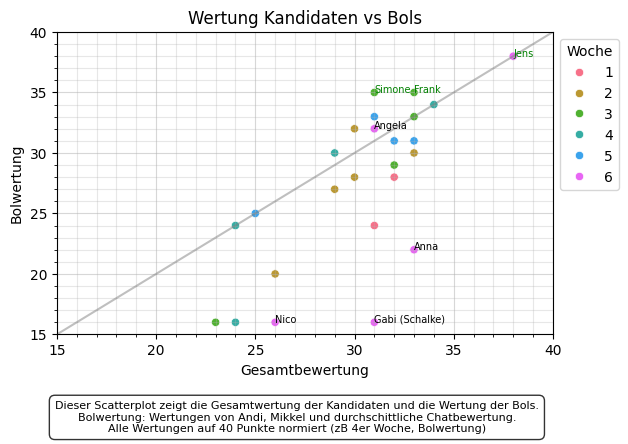

In [8]:
axis_min = 15


ax = sns.scatterplot(data=df, x="Gesamtbewertung", y="Bolwertung", hue="WochenID", palette=sns.color_palette("husl", 6))

# title
ax.set_title("Wertung Kandidaten vs Bols")


# axis
ax.set_xlim(axis_min, 40)
ax.set_ylim(axis_min, 40)

# grid
major_ticks = np.arange(axis_min, 41, 5)
minor_ticks = np.arange(axis_min, 41, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which="minor", alpha=.3)
ax.grid(which="major", alpha=.5)

# diagonal line
linespace = np.linspace(axis_min, 40)
sns.lineplot(x=linespace, y=linespace, color="grey", alpha=.5)

# legend
#labels = [f"Woche {i}" for i in range(1, last_week+1)]
#ax.legend(labels=labels)
ax.legend(title="Woche")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))



for index, row in df.iterrows():

    # perfect dinner
    if row["Gesamtbewertung"] >= 35 or row["Bolwertung"] >= 35:
        ax.annotate(row["Person"], (row["Gesamtbewertung"], row["Bolwertung"]), size=7, color="g")

    # high difference in rating
    #elif row["Distance"] >= 10:
    #    ax.annotate(row["Person"], (row["Gesamtbewertung"], row["Bolwertung"]), size=7, color="red")

    # current week
    elif row["WochenID"] == last_week:
        ax.annotate(row["Person"], (row["Gesamtbewertung"], row["Bolwertung"]), size=7)


plt.subplots_adjust(bottom=0.25)

# Add a textbox below the plot
plt.figtext(
    0.5, 0.05,  # x, y in figure coordinates (0–1)
    "Dieser Scatterplot zeigt die Gesamtwertung der Kandidaten und die Wertung der Bols.\n"
    "Bolwertung: Wertungen von Andi, Mikkel und durchschittliche Chatbewertung.\n"
    "Alle Wertungen auf 40 Punkte normiert (zB 4er Woche, Bolwertung)",
    wrap=True,
    ha="center",
    fontsize=8,
    bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.5")
)

#ax.get_figure().savefig("out.jpg", dpi=150)
